<a id='top'></a>
# Recreational Marijuana Legalization
## The Impacts of Recreational Marijuana Legalization on Adolescents
### Ben Raymon

<a id='toc'></a>
## Table of Contents
* [Introduction](#intro)
* [Data](#data)
    * [NSDUH Survey Data](#nsduh)
    * [State Marijuana Laws Data](#sml)
    * [Geographic Data](#geo)
* [Interactive Map](#lawsmap)
* [Teen Use of Marijuana](#teens)
    * [First Time Use of Marijuana](#teensFTU)
        * [Visualization](#ftuVis)
        * [Statistical Test](#ftuStat)
        * [Trendlines and Predictions](#ftuTP)
        * [Summary](#ftuSum)
    * [Past Year Marijuana Use](#teensPY)
        * [Visualization](#PYhist)
        * [Plotting with Confidence Intervals](#PYconfInt)
        * [Rates of Change](#PYrod)
        * [Statistical Test](#PYtest)
        * [Summary](#PYsum)
    * [Ethical Concerns](#teenEthics)
* [Marijuana as a Gateway Drug: Teen Use of Hard Substances](#gateway)
    * [Pain Relievers](#pr)
        * [Plotting with Confidence Intervals](#prci)
        * [Rates of Decline](#prROD)
    * [Heroin](#heroin)
        * [Plotting with Confidence Intervals](#heroinci)
        * [Statistical Test](#heroinStat)
    * [Methamphetamines](#meth)
        * [Plotting with Confidence Intervals](#methci)
        * [Statistical Test](#methStat)
    * [Summary and Ethics](#gatewaysum)
* [Sources](#sources)

<a id='intro'></a>
## Introduction
#### The Impacts of Recreational Marijuana Legalization on Adolescents

California became the first state to legalize marijuana for medicinal use in 1996 ([Trumble, 2017](https://www.thirdway.org/infographic/timeline-of-state-marijuana-legalization-laws)). Twenty-five years later and there are now 17 states (including District of Columbia) with recreational marijuana fully legal, and another 19 states allowing marjuana for medicinal use. As of April 2021 there are only 15 states with marijuana considered to be fully illegal ([DISA Global Solutions, 2021](https://disa.com/map-of-marijuana-legality-by-state)). An interactive map displaying the legal status of marijuana in each state can be found [here](#lawsmap).

According to Tax Foundation, states with fully operational marijuana markets earned between 20 million and one billion dollars in tax revenue in 2020 alone ([Christy Bieber, 2021](https://www.fool.com/research/marijuana-tax-revenue-by-state/#:~:text=That%20remains%20to%20be%20seen,revenue%20from%20recreational%20cannabis%20already.)). Out of the remaining states (ones without fully operational markets as of 2020), estimates show that the government could potentially earn an additional $4.1 billion in tax revenue by legalizing recreational marijuana federally. 
With the potential tax benefits of recreational marijuana legalization (RML) and the fact that 36 states already have marijuana legalized in some form, why won't the government legalize recreational marijuana federally?

One major argument against legalization is that marijuana use in teens will increase with recreational marijuana becoming legal. While one study analyzing results from a statewide survey suggests RML increases use in teens ([Paschall, Garcia-Ramirez, Grube, 2021](https://pubmed.ncbi.nlm.nih.gov/33573728/)) other studies refute those claims. The results of a study on a different survey actually stuggest that RML leads to a slight decline in marijuana use among adolescents ([Coley, Kruzik, Ghiani, Carey, Hawkins, Baum, 2020](https://pubmed.ncbi.nlm.nih.gov/33243722/)).

Another common argument against RML is that marijuana could be a gateway drug that leads to the use of other 'harder' substances. A study conducted by Arthur Robin Williams claims that marijuana use, along with other genetic and environmental factors, increases the likeliness of opioid use disorder in the future ([Williams, 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7359408/)). On the other hand, the [CDC](https://www.cdc.gov/marijuana/faqs/does-marijuana-lead-to-other-drugs.html) claims that the majority of cannabis users do not go on to use harder substances. 

With many studies and sources contradicting each other, I plan to analyze adolescent substance use data to determine if these claims against RML hold to be true. Responses from the [National Survey on Drug Use and Health](https://www.samhsa.gov/data/data-we-collect/nsduh-national-survey-drug-use-and-health) (NSDUH) can be used to answer the following questions.  
* Does RML increase cannabis usage among teens?
* Is marijuana a gateway drug? 
    * That is a very broad and difficult to answer question, however, adolescent usage of the following substances may provide valuable insight
        * Pain Relievers
        * Heroin 
        * Methamphetamines

<a id='data'></a>
# Data

<a id='nsduh'></a>
### National Survey on Drug Use and Health (NSDUH) Data

Since 1971 the Substance Abuse and Mental Health Services Administration (SAMHSA) has been conducting a yearly survey on drug use and health. While the exact questions may vary slightly year to year, the [NSDUH](https://nsduhweb.rti.org/respweb/homepage.cfm) asks a wide range of questions related to mental health illness and substance abuse. For the purpose of this analysis, I will only be focusing on the survey questions related to substance use. 

There are a total of 16 questions that have potential to be relevant in the analysis. The data in this set includes total population count (in thousands of people) and population percentage for each question, totalling in over 32 columns. Due to the large number of columns, the data set can be difficult to read in one view. Below is an example of the estimates for one of the questions, including totals and percentages. 

In [1]:
#import all methods and imports in the conf_int_methods.py file
from imports_file import *
#read data from scraper results
df = pd.read_csv("data/drugdata.csv")
#clean data, combine rows and group (combine using groupby)
df.rename(columns={'Year':'Survey Year'}, inplace=True)
#group by also  removes state, year, and age indexes
df = df.groupby(['State', 'Survey Year', 'Age']).first()
#save as data.csv
df.to_csv("data/data.csv")
#read data.csv to get the state, year, age indexes back
df = pd.read_csv('data/data.csv')
#replace the autocorrected 17-Dec with the actual age range
df['Age'] = df['Age'].replace('17-Dec', '12-17')
df['State'] = df['State'].apply(lambda x : x.title())
#save the new cleaned data file with the right ages
df.to_csv('data/data.csv', index=False)

data = pd.read_csv('data/data.csv')
data.iloc[:, 0:4].join(data.iloc[:, 19:20]) 

,State,Survey Year,Age,Past Month Illicit Drug Use (total),Past Month Illicit Drug Use %
0,Alabama,2013,12+,304.0,7.57
1,Alabama,2013,12-17,30.0,7.75
2,Alabama,2013,18+,274.0,7.55
3,Alabama,2013,18-25,94.0,17.47
4,Alabama,2013,26+,180.0,5.83
...,...,...,...,...,...
1960,Wyoming,2019,12+,42.0,8.68
1961,Wyoming,2019,12-17,4.0,8.03
1962,Wyoming,2019,18+,38.0,8.75
1963,Wyoming,2019,18-25,11.0,18.99


The list of questions involving substance use is shown below

In [2]:
data.iloc[1:1, 3:19]

,Past Month Illicit Drug Use (total),Past Year Marijuana Use (total),Past Month Marijuana Use (total),Past Year Cocaine Use (total),Past Month Alcohol Use (total),Past Month Binge Alcohol Use (total),Past Month Cigarette Use (total),First Use of Marijuana (total),Past Month Illicit Drug Use Other Than Marijuana (total),Past Year Heroin Use (total),Past Year Methamphetamine Use (total),Past Year Misuse of Pain Relievers (total),Illicit Drug Use Disorder (total),Pain Reliever Use Disorder (total),Alcohol Use Disorder (total),Substance Use Disorder (total)


<a id='sml'></a>
### State Marijuana Laws Data
This data set includes the legal status of cannabis in each state. Since I will be analyzing substance usage pre and post legalization, I only included states that passed laws in or before 2017. I created this data set myself with the information coming from https://en.wikipedia.org/wiki/Legality_of_cannabis_by_U.S._jurisdiction. 

In [3]:
#read file
state_laws = pd.read_csv("data/laws.csv")
#replace empty rows in legal status column with Illegal
state_laws['Legal Status'] = state_laws['Legal Status'].fillna("Illegal")
#fill NaN in year column with 0
state_laws = state_laws.fillna(0)
state_laws['Year Passed'] = state_laws['Year Passed'].astype(int)

#merge state laws with NSDUH data set
#this also drops regions and US (only keeps 50 states)
data_states = data.merge(state_laws, on='State')

The data set includes 3 columns, state, legal status and year passed. Legal status can be one of 3 options, recreational, medical, or illegal. Recreational states have cannabis legalized for usage among anyone 21 and over. Medical states allow cannabis to treat medical conditions and states marked as illegal do not allow the consumption of cannabis under any circumstance. The year passed column contains the year that the bill was passed in. If a state legalized medical marijuana in 2010 and recreational marijuana in 2016, the year passed column will contain 2016. 

*Note: some states allow the use of CBD oil for medical conditions, those states are marked as illegal not as medical.*

In [4]:
state_laws.head(3)

,State,Legal Status,Year Passed
0,Alabama,Illegal,0
1,Alaska,Recreational,2014
2,Arizona,Medical,2010


<a id='geo'></a>
### Geographic Data
In order to plot the map shown in this analysis, I will be using cartographic boundary shape files from the [US Census](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html). The `cb_2018_us_state_20m` file contains state geometry and the geoIDs necessary to plot a United States map. Additionally, a data set containing longitude and lattitude coordinates of each state is used in the mapping. The statelatlong dataset was created by Washim Ahmed and is available on [kaggle](https://www.kaggle.com/washimahmed/usa-latlong-for-state-abbreviations). 

In [5]:
#read state lat and long coords
locations = pd.read_csv("data/statelatlong.csv")
#rename columns to be consistent with the other data
locations.rename(columns={'State':'Abv'}, inplace=True)
locations.rename(columns={'City':'State'}, inplace=True)

#read state geographic file
geo_usa = geopandas.read_file('data/cb_2018_us_state_20m')
geo_usa.rename(columns={'NAME':'State'}, inplace=True)

geo_merge=geo_usa.merge(locations,on='State')

<a id='lawsmap'></a>
# Marijuana Laws Map

[Jump back to Introduction](#intro)

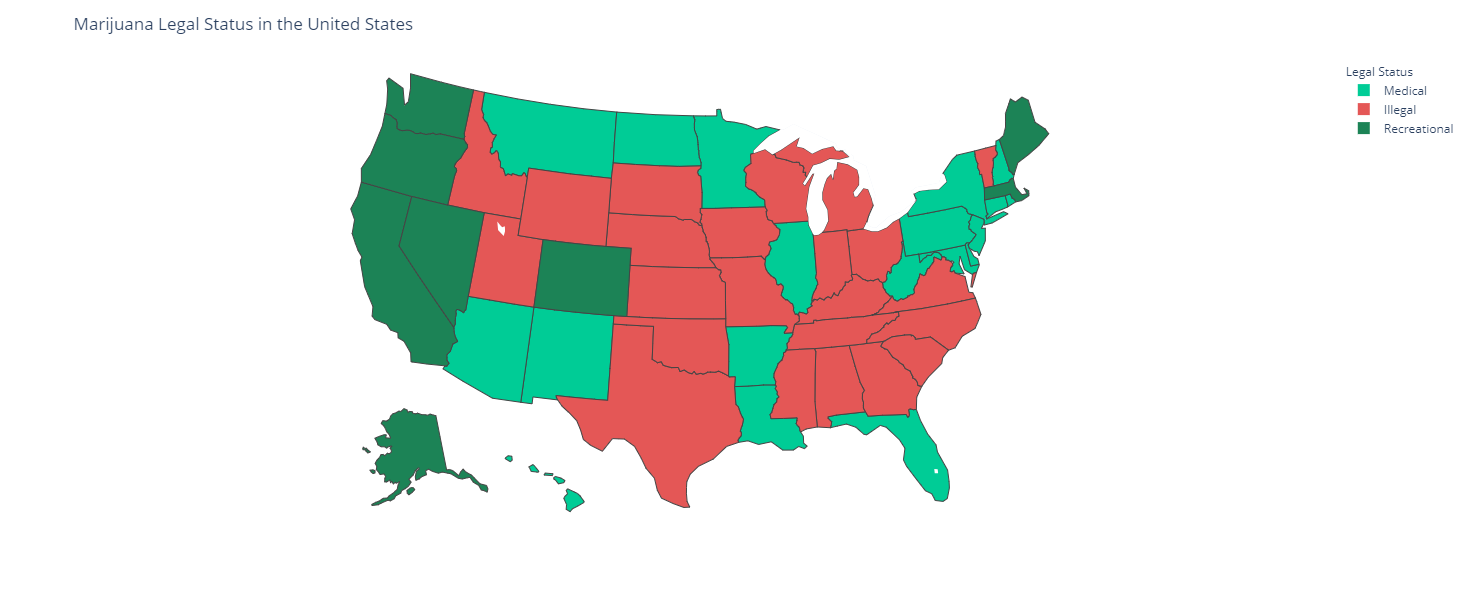

In [6]:
#interactive map
geo_state_laws=geo_merge.merge(state_laws, on='State')

fig = px.choropleth(geo_state_laws, locations="STUSPS", locationmode='USA-states',
                    labels={'Year Passed':'Year Passed', 'STUSPS':'State', 'Legal Status':'Legal Status'},
                    hover_data=['Year Passed'],
                    color="Legal Status", # lifeExp is a column of gapminder
                    color_discrete_sequence=['#00CC96', '#E45756', '#1C8356'], width = 1200, height=600)
#only map states, add title
fig.update_layout(
    title_text = 'Marijuana Legal Status in the United States',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<a id='teens'></a>
# Teen Use of Marijuana

The data_states set includes all of the age categories listed in the NSDUH survey. These age groups include 12+, 12-17, 18+, 18-25 and 26+. This analysis is mainly focused on the effects of cannabis on adolescents, so the 12-17 age category will be used most frequently.

In [7]:
#take the dataframe of all people surveyed, 12-17 age (prevent overlapping data)
data_teens = data_states[data_states['Age'] == '12-17']
illegal_data = data_teens[data_teens['Legal Status'] == 'Illegal']
recreational_data = data_teens[data_teens['Legal Status'] == 'Recreational']
medical_data = data_teens[data_teens['Legal Status'] == 'Medical']

<a id='teensFTU'></a>
## First Use of Marijuana
[Jump to TOC](#toc)

The specific focus of this subsection will be on the data in the `First Use of Marijuana` columns. These columns include total counts and percentages for the estimated number of teens that used marijuana for the first time in each state between 2015 and 2019. 

*Note: Survey year 2013 and 2014 are missing data because this question was not part of the survey during those years.*

In [8]:
data_teens.iloc[:, 0:3].join(data_teens.iloc[:, 10:11].join(data_teens.iloc[:, 26:27]))

,State,Survey Year,Age,First Use of Marijuana (total),First Use of Marijuana %
1,Alabama,2013,12-17,NaN,NaN
6,Alabama,2014,12-17,NaN,NaN
11,Alabama,2015,12-17,16.0,4.36
16,Alabama,2016,12-17,15.0,4.19
21,Alabama,2017,12-17,14.0,3.91
...,...,...,...,...,...
1726,Wyoming,2015,12-17,2.0,5.33
1731,Wyoming,2016,12-17,2.0,4.96
1736,Wyoming,2017,12-17,2.0,4.45
1741,Wyoming,2018,12-17,2.0,5.29


<a id='ftuVis'></a>
### Visualization

A waffle graph is used to visually represent the different number of teens using marijuana for the first time in recreatioal, medical, and illegal states. Each figure in the waffle figure below represents one thousand teens that used marijuana for the first time in 2019. 

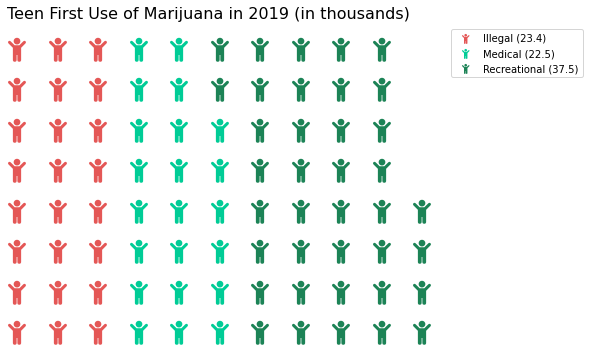

In [9]:
data_teens_2019 = data_teens[data_teens['Survey Year'] == 2019].groupby('Legal Status').mean().round(decimals=1)
colors = ['#E45756', '#00CC96', '#1C8356']
fig = plt.figure(
    FigureClass = Waffle,
    rows=8,
    icons='child', icon_size=24,icon_legend=True,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    values = data_teens_2019['First Use of Marijuana (total)'],
    labels =[f"{k} ({v})" for k, v in data_teens_2019['First Use of Marijuana (total)'].items()],
    colors=(colors[0], colors[1], colors[2]),
    title={
        'label': 'Teen First Use of Marijuana in 2019 (in thousands)',
        'loc': 'left','fontdict': {'fontsize': 16}},
    figsize = (9,5)
)

In 2019, an estimated 37,500 teens living in recreational states used marijuana for the first time. Only 22,500 teens living in medical states used marijuana for the first time in 2019, with another 23,400 first time users in illegal states. An additional 14 thousand teens in recreational states used marijuana for the first time when compared to teens in illegal states. Based solely on this visualization, one can argue that RML increases cannabis usage among teens. However, other factors must be considered and further analysis is required for a substantial claim to be made. 

<a id='ftuStat'></a>
### Statistical Test

A statistical test will be conducted to determine if the differences in proportions of teens using marijuana for the first time in recreational and illegal states is statistically significant. While a difference in total counts has been clearly shown with the waffle graph above, an ANCOVA test will determine if the proportional difference is statistically significant. The ANCOVA test is used to remove the effect of survey year and focus on how the legal status of cannabis effects teen use. 

In [10]:
ancova(data=data_teens, dv='First Use of Marijuana %', covar='Survey Year', between='Legal Status', effsize='np2')

,Source,SS,DF,F,p-unc,np2
0,Legal Status,98.376385,2,55.474106,1.342642e-20,0.311698
1,Survey Year,4.384226,1,4.944500,2.708626e-02,0.019782
2,Residual,217.238419,245,NaN,NaN,NaN


The resulting p-values of the ANCOVA test fall below the significance level of 0.05 indicating that these proportions are significantly different. This test provides evidence that the proportion of teens using marijuana for the first time is significantly greater in recreational states than in illegal states. It is important to note that just because the proportion of first time users is greater in recreational states, this does not prove RML caused that increase. While the ANCOVA test provides sufficient evidence that RML is correlated with an increase in teen use, correlation does not imply causation and that must be taken into consideration when analyzing these results. 

<a id='ftuTP'></a>
### Trendlines and Predictions

To estimate how many teens will start using marijuana in future years, lines of best fit can be calculated and used as prediction models.

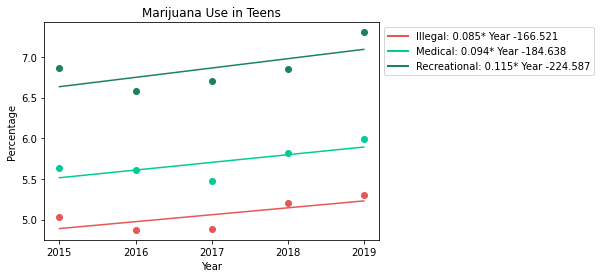

In [11]:
#group data from each legal status into averages per year
medical_data = medical_data.groupby(['Survey Year']).mean().reset_index()
illegal_data = illegal_data.groupby(['Survey Year']).mean().reset_index()
recreational_data = recreational_data.groupby(['Survey Year']).mean().reset_index()
#figure for plots
fig, ax = plt.subplots()
#calculate slope and intercept of 3 trendline equations
mi, bi = np.polyfit(illegal_data['Survey Year'][2:], illegal_data['First Use of Marijuana %'].dropna(), 1)
mr, br = np.polyfit(recreational_data['Survey Year'][2:], recreational_data['First Use of Marijuana %'].dropna(), 1)
mm, bm = np.polyfit(medical_data['Survey Year'][2:], medical_data['First Use of Marijuana %'].dropna(), 1)
#plot data points and trendlines for each of the three legalities
ax.plot(illegal_data['Survey Year'][2:], illegal_data['First Use of Marijuana %'][2:], 'o', color=colors[0])
ax.plot(illegal_data['Survey Year'][2:], mi*illegal_data['Survey Year'][2:] + bi, color=colors[0])
ax.plot(recreational_data['Survey Year'][2:], recreational_data['First Use of Marijuana %'][2:], 'o', color=colors[2])
ax.plot(recreational_data['Survey Year'][2:], mr*recreational_data['Survey Year'][2:] + br, color=colors[2])
ax.plot(medical_data['Survey Year'][2:], medical_data['First Use of Marijuana %'][2:], 'o', color=colors[1])
ax.plot(medical_data['Survey Year'][2:], mm*medical_data['Survey Year'][2:]+ bm, color=colors[1])
#trendline equation for legend
illegal = 'Illegal: '+ str(mi.round(3)) + '* Year ' + str(bi.round(3))
med = 'Medical: '+ str(mm.round(3)) + '* Year ' + str(bm.round(3))
rec = 'Recreational: '+ str(mr.round(3)) + '* Year ' + str(br.round(3))
#create legend
legend_elements = [Line2D([0], [0], color=colors[0], lw=2, label=illegal),
                   Line2D([0], [0], color=colors[1], lw=2, label=med),
                   Line2D([0], [0], color=colors[2], lw=2, label=rec)]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
#display plot
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Marijuana Use in Teens")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()

Based on the lines of best fit calculated above, the percentage of teens who will use marijuana for the first time is expected to increase in all states as the slopes of the trendlines are all positive. However, recreational states are expected to have the highest rate of increase while illegal states have the lowest. In fact, the slope of the recreational trendline is 35% greater than the slope of the illegal trendline. This indicates that the proportion of teens expected to use marijuana for the first time in recreational states is predicted to grow 35% faster than that of illegal states. 

In [12]:
(0.115 - 0.085)/0.085

0.3529411764705882

If these trendlines hold to be accurate, in 2025 the percentage of teens using marijuana for the first time in recreational states is expected to be about 7.78%. At the same time, medical and illegal states continue to have percentages below 6.5%. 

In [13]:
print(mr*2025 + br)
print(mm*2025 + bm)
print(mi*2025 + bi)

7.78174999999996
6.458315789473687
5.739992094861634


It isn't until 2050, another twenty five years later, that the predicted proportion of teens using marijuana for the first time in illegal states hits the same level as the prediction for recreational states in 2025. 

In [14]:
print(mr*2050 + br)
print(mm*2050 + bm)
print(mi*2050 + bi)

10.650499999999596
8.817526315789223
7.866671936758621


These trendlines and predictions align with the results of the ANCOVA test. As expected, states with recreational marijuana predict a higher increase in first time teen usage over the next few years. The predicted estimates provide even further evidence to back the claim that RML can lead to an increase in marijuana use among teens. Again it must be noted that these pieces of evidence may be used to back the claim that RML *can* lead to an increase in teen use, but it does not prove that RML is the only thing that causes such an increase. 

<a id='ftuSum'></a>
### Summary

After looking at the [waffle visualization](#ftuVis) it is evident that states with recreational marijuana have higher first time usage among teens. The [ANCOVA test](#ftuStat) provides sufficient evidence that the differences shown in the waffle graph are statistically significant. While the results of the statistical test provide evidence that recreational states have a significantly greater proportion of teens using marijuana than illegal states, they do not prove that RML is the sole cause of this difference. When further analyzing [trendlines](#ftuTP), it becomes even more clear that RML correlates to more people using marijuana for the first time in their teenage years. Based on the predictions, states with recreational marijuana are expected to see first use in teens grow 35% faster than illegal states. Analysis of the `First Use of Marijuana` data has contributed sufficient evidence to back the claim that more people will use marijuana for the first time in their adolescent years if they live in a recreational state. It is important to remember that this correlation does not imply that RML directly causes more teens to use marijuana for the first time. Lawmakers might abuse this data in an attempt to prevent RML laws from being passed. The full scope of these results must be considered in order to prevent data manipulation and an abuse of power. 

<a id='teensPY'></a>
## Past Year Marijuana Use
[Jump to TOC](#toc)

The specific focus of this subsection will be on the data in the `Past Year Marijuana Use` columns. These columns include total counts and percentages for the estimated number of teens in each state that used marijuana at least once during the year that the survey was conducted.

In [15]:
data_teens.iloc[:, 0:3].join(data_teens.iloc[:, 4:5].join(data_teens.iloc[:, 20:21]))

,State,Survey Year,Age,Past Year Marijuana Use (total),Past Year Marijuana Use %
1,Alabama,2013,12-17,40.0,10.36
6,Alabama,2014,12-17,38.0,9.90
11,Alabama,2015,12-17,37.0,9.71
16,Alabama,2016,12-17,38.0,10.11
21,Alabama,2017,12-17,36.0,9.67
...,...,...,...,...,...
1726,Wyoming,2015,12-17,6.0,13.30
1731,Wyoming,2016,12-17,6.0,12.63
1736,Wyoming,2017,12-17,5.0,11.75
1741,Wyoming,2018,12-17,6.0,12.53


<a id='PYhist'></a>
### Visualization

A histogram is plotted to give a better visual representation of the data.

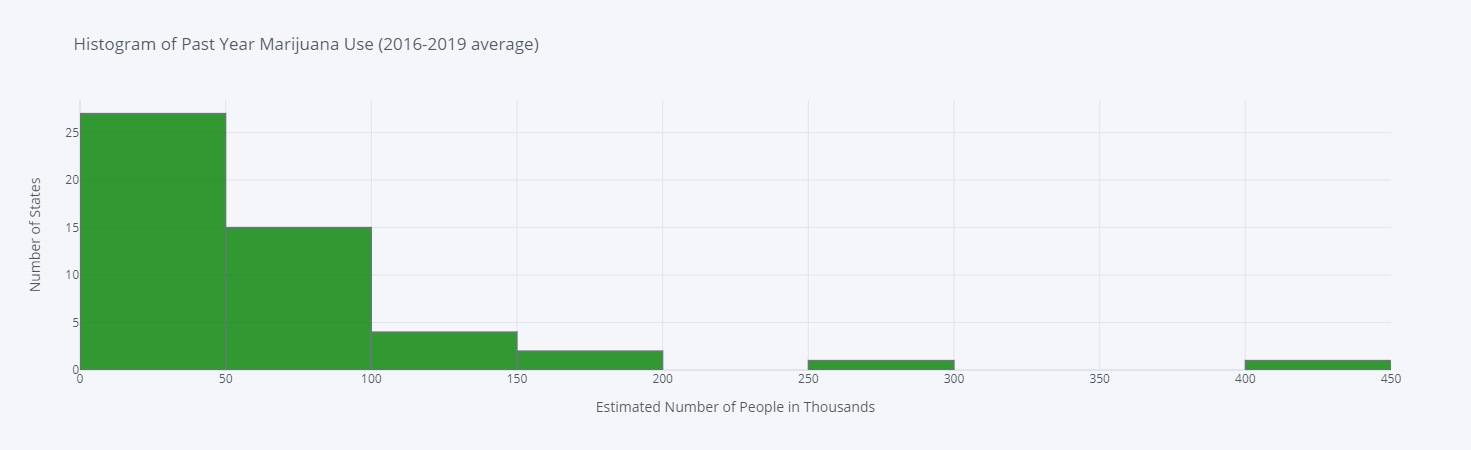

In [16]:
#average between all the survey years
data_teen = data_teens.groupby(['State']).mean().drop(['Survey Year'], axis=1)
data_teen['Past Year Marijuana Use (total)'].iplot(kind='hist', xTitle='Estimated Number of People in Thousands', yTitle='Number of States', title='Histogram of Past Year Marijuana Use (2016-2019 average)', color='Green')

The histogram above shows that more than half of the US states estimate between 0 and 50 thousand teens use marijuana. The shape of this histogram is heavily skewed right, which means very few states have high numbers. Fourty two states estimate that less than 100 thousand teens use marjuana while only 2 states give estimates above 200 thousand teens. There is also not a lot of variability, as most of the state estimates fall in the first two bins. 

<a id='PYconfInt'></a>
### Plotting with Confidence Intervals

First, confidence intervals are calculated at a 95% confidence level for the past year marijuana use in recreational, medical, and illegal states. 

In [17]:
#Calculating Confidence Intervals
illegal_data = data_teens[data_teens['Legal Status'] == 'Illegal']
recreational_data = data_teens[data_teens['Legal Status'] == 'Recreational']
medical_data = data_teens[data_teens['Legal Status'] == 'Medical']

question = "Past Year Marijuana Use %"

#call my method in conf_int_methods.py to calculate the upper and lower confidence interval values
y_upper_i, y_lower_i = calc_CI(illegal_data, question, 2013)
y_upper_m, y_lower_m = calc_CI(medical_data, question, 2013)
y_upper_r, y_lower_r = calc_CI(recreational_data, question, 2013)

medical_data = medical_data.groupby(['Survey Year']).mean().reset_index()
illegal_data = illegal_data.groupby(['Survey Year']).mean().reset_index()
recreational_data = recreational_data.groupby(['Survey Year']).mean().reset_index()

y_upper_i[2] = (y_upper_i[1]+y_upper_i[3])/2
y_lower_i[2] = (y_lower_i[1]+y_lower_i[3])/2


Next, a pivot table of the average 'Past Year Marijuana Use %' is created to plot average values for each year in the three different legal categories.


In [18]:
df = pd.pivot_table(data_teens, values='Past Year Marijuana Use %', index=['Survey Year'],columns='Legal Status', aggfunc=np.mean)
df

Legal Status,Illegal,Medical,Recreational
Survey Year,,,
2013,12.402174,14.453684,16.13500
2014,12.042174,13.763684,17.01000
2015,11.934545,13.306842,16.37375
2016,11.789565,13.035263,15.56500
2017,11.656522,12.669474,15.66625
2018,11.869130,12.825263,15.80125
2019,11.861739,13.086842,17.05375


<a id='PYvis'></a>
Finally, a figure is displayed containing a combined line plot of all 3 categories as well as inidividual confidence intervals for each one. 

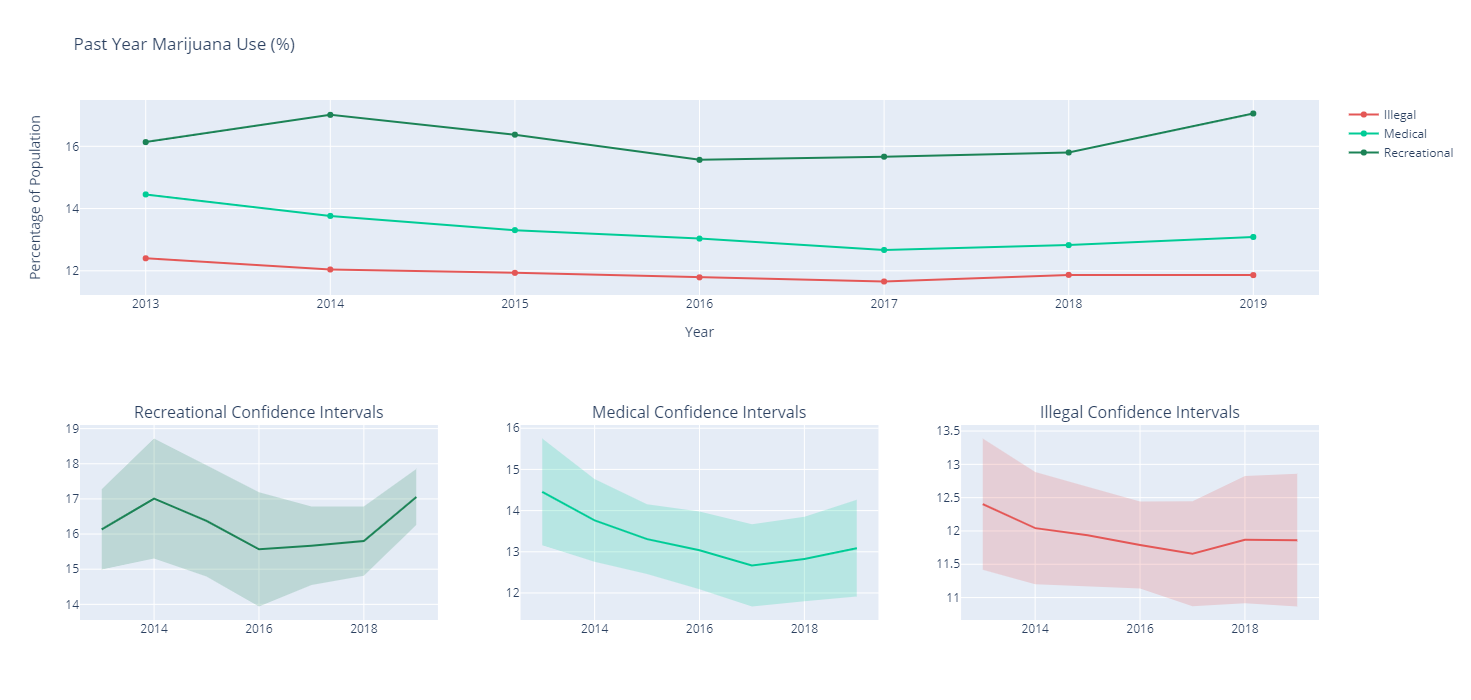

In [19]:
question = "Past Year Marijuana Use %"
#call my method in conf_int_methods.py that creates a figure with
#one big plot above 3 small plots
fig = create_fig(df)
# call the add_plot method in conf_int_methods.py to add each one of the lower 3 plots to the figure
add_plot(illegal_data, 2, 3, 'rgb(228,87,86)', fig, y_upper_i, y_lower_i, 'rgba(228,87,86,0.2)', question)
add_plot(medical_data, 2, 2, 'rgb(0,204,150)', fig, y_upper_m, y_lower_m, 'rgba(0,204,150,0.2)', question)
add_plot(recreational_data, 2, 1, 'rgb(28,131,86)', fig, y_upper_r, y_lower_r, 'rgba(28,131,86,0.2)', question)
fig.update_layout(title_text="Past Year Marijuana Use (%)", height=700)
fig.update_layout(xaxis_title="Year", yaxis_title = "Percentage of Population")
fig.show()

The visualization above shows that recreational states had the highest averages when compared to illegal and medical states. The states without full legalization have an overall decrease in marijuana use between 2013 and 2019, while recreational states had a slight increase. This would pertain to the argument that RML leads to an increase in teen marijuana usage. While a statistical test is necessary to claim the difference is significant, there is roughly a 4% gap between the averages in recreational states and states without any form of legalization. On the other hand, recreational states saw the biggest decline between 2014 and 2018. Although medical and illegal states both saw declines within these years, recreational states had the greatest decline of 1.2%. It was only the spike between 2018 and 2019 that caused recreational states to exhibit an overall increase within the plotted time period. 

<a id='PYrod'></a>
### Rates of Change

As mentioned above, recreational states saw the biggest decline between 2014 and 2018. However, this was also the only category that saw an overall increase between 2013 and 2019.   

In [20]:
print("Recreational States: change between 2014 and 2018 = ", df['Recreational'][2018] - df['Recreational'][2014], " overall change between 2013 and 2019 = ", df['Recreational'][2019] - df['Recreational'][2013])
print("Medical States: change between 2014 and 2018 = ", df['Medical'][2018] - df['Medical'][2014], " overall change between 2013 and 2019 = ", df['Medical'][2019] - df['Medical'][2013])
print("Illegal States: change between 2014 and 2018 = ", df['Illegal'][2018] - df['Illegal'][2014], " overall change between 2013 and 2019 = ", df['Illegal'][2019] - df['Illegal'][2013])

Recreational States: change between 2014 and 2018 =  -1.208750000000002  overall change between 2013 and 2019 =  0.9187500000000028
Medical States: change between 2014 and 2018 =  -0.9384210526315808  overall change between 2013 and 2019 =  -1.3668421052631583
Illegal States: change between 2014 and 2018 =  -0.17304347826087074  overall change between 2013 and 2019 =  -0.5404347826086919


<a id='PYtest'></a>
### Statistical Test

Conduct an ANCOVA test to determine if the difference shown in the [visualization](#PYvis) is statistically significant. This test is conducted on the 12-17 age category, focusing on all teens (and preventing data overlaps). The ANCOVA test is used to remove the effect of survey year and focus on how the legal status of cannabis effects teen usage. 

In [21]:
ancova(data=data_teens, dv='Past Year Marijuana Use %', covar='Survey Year', between='Legal Status', effsize='np2')

,Source,SS,DF,F,p-unc,np2
0,Legal Status,769.496244,2,95.702976,8.632766e-34,0.356830
1,Survey Year,23.230725,1,5.778454,1.675069e-02,0.016473
2,Residual,1386.979881,345,NaN,NaN,NaN


The p-value results from the ANCOVA test are both below 0.05 indicating statistical significance. The average teen marijuana use in illegal, recreational, and medical states are significantly different from each other. While other factors must be considered, this test provides evidence that legalization of marijuana has an impact on teen marijuana use. Based on the visualization, it is clear that the significant difference comes from recreational states having greater averages than illegal states. 

<a id='PYsum'></a>
### Summary

The [plot](#PYvis) with the average proportion of teens who used marijuana between 2013 and 2019 displays the relationship between RML and teen use. Medical and illegal states saw a decrease between 2013 and 2019, while recreational states had an increase of almost 1%. The visualization may be used to initiate an argument over RML and teen marijuana use, however, the differences displayed in the graph alone do not provide sufficient evidence that there is any statistical significance. However, after conducting an ANCOVA test, results showed that there is in fact a significant difference in average teen use of marijuana between recreational, medical and illegal states. This test provides the evidence required to claim that legalization of marijuana has an impact on adolescent use. Recreational states do have a significantly greater proportion of teens using marijuana than medical and illegal states. It is important to note that the test only provides evidence that the proportion is greater, it does not provide evidence that the difference in proportions is caused by RML. One must consider the full scope of this analysis when interpreting the data in order to prevent manipulation and misuse. Someone may try to use these results to argue that recreational marijuana should not be legalized as it leads to an increase of teen usage. While the data provides evidence that more teens use marijuana in recreational states, it does not mean that this can be used to directly claim that RML is the cause of this increase. It is also important to note that the visualization tells different stories based on the time period in focus. When looking at the data between (and including) 2014 and 2018, recreational states exhibited a 1.2% decrease while neither medical nor illegal states dropped more than 1%. Although they would be lacking statistical significance, one might try to focus on these years to claim that RML decreases marijuana usage among teens. Again, it is important to consider the entire scope of the analysis as the data can be manipulated into favoring a specific opinion. 

<a id='teenEthics'></a>
## Ethical Concerns
[Jump to TOC](#toc)

There are important ethical aspects to consider when analyzing these results. One of the biggest ethical concerns here would be misuse and abuse of data. Without looking at the entire analysis, certain pieces can be taken out and used to highlight a certain point of view. On one hand, both ANCOVA tests display significant differences in first time and past year marijuana use among teens. By using the ANCOVA results, anti-legalization politicians may claim that RML increases marijuana use in teens. These lawmakers may try to use my analysis to argue against RML in an attempt to prevent bills from being passed. Additionally, news sources may be tempted to persuade parents to vote against RML bills, possibly using the [waffle graph](#ftuVis) to claim that recreational marijuana will result in more children using cannabis for the first time. While these claims are not entirely supported by those pieces of data, that does not mean people will not try to use the data in misleading ways. On the other hand, pro-legalization lawmakers might attempt to use the data between 2014 and 2018 to claim that RML decreases marijuana use in teens. Democratic lawmakers such as [Kelly Cassidy](https://www.bettergov.org/news/fact-check-cassidy-puffs-up-what-stats-say-about-teen-marijuana-use/) and [Melissa Agard](https://www.statesman.com/story/news/politics/politifact/2021/03/09/wisconsin-democratic-lawmaker-overstates-youth-marijuana-claim/4642482001/) have already tried to argue that RML decreases use in teens.  Although it is true that recreational states saw the biggest decline during this period, the claim that RML decreases use in teens is not strongly supported by the data. Depending on which story someone wants to tell, or what opinions they hold on RML, this data has the potential to be manipulated and misused. That is why context, scope, and an unbiased perspective are cricual in maintaining ethical uses of the data. 

<a id='gateway'></a>
# Marijuana as a Gateway Drug: Teen Use of Hard Substances

<a id='pr'></a>
## Pain Relievers
[Jump to TOC](#toc)

The specific focus of this subsection will be on the data in the `Past Year Misuse of Pain Relievers` columns. These columns include total counts and percentages for the estimated number of teens in each state that misused pain relievers between 2016 and 2019. 

*Note: Survey year 2013, 2014, and 2015 are missing data because this question was not part of the survey during those years.*


In [22]:
data_teens.iloc[:, 0:3].join(data_teens.iloc[:, 14:15].join(data_teens.iloc[:, 30:31]))

,State,Survey Year,Age,Past Year Misuse of Pain Relievers (total),Past Year Misuse of Pain Relievers %
1,Alabama,2013,12-17,NaN,NaN
6,Alabama,2014,12-17,NaN,NaN
11,Alabama,2015,12-17,NaN,NaN
16,Alabama,2016,12-17,19.0,5.05
21,Alabama,2017,12-17,16.0,4.24
...,...,...,...,...,...
1726,Wyoming,2015,12-17,NaN,NaN
1731,Wyoming,2016,12-17,2.0,3.80
1736,Wyoming,2017,12-17,1.0,3.09
1741,Wyoming,2018,12-17,1.0,3.10


<a id='prci'></a>
### Plot with Confidence Intervals

Confidence intervals are calculated at a 95% confidence level for the past year misuse of pain relievers in recreational, medical and illegal states. A pivot table with the yearly averages in illegal, medical, and recreational states is used to graph all 3 line plots in the same figure. Finally, the calculated confidence intervals are used in individual plots to visually display the margin of error with the survey estimates. 

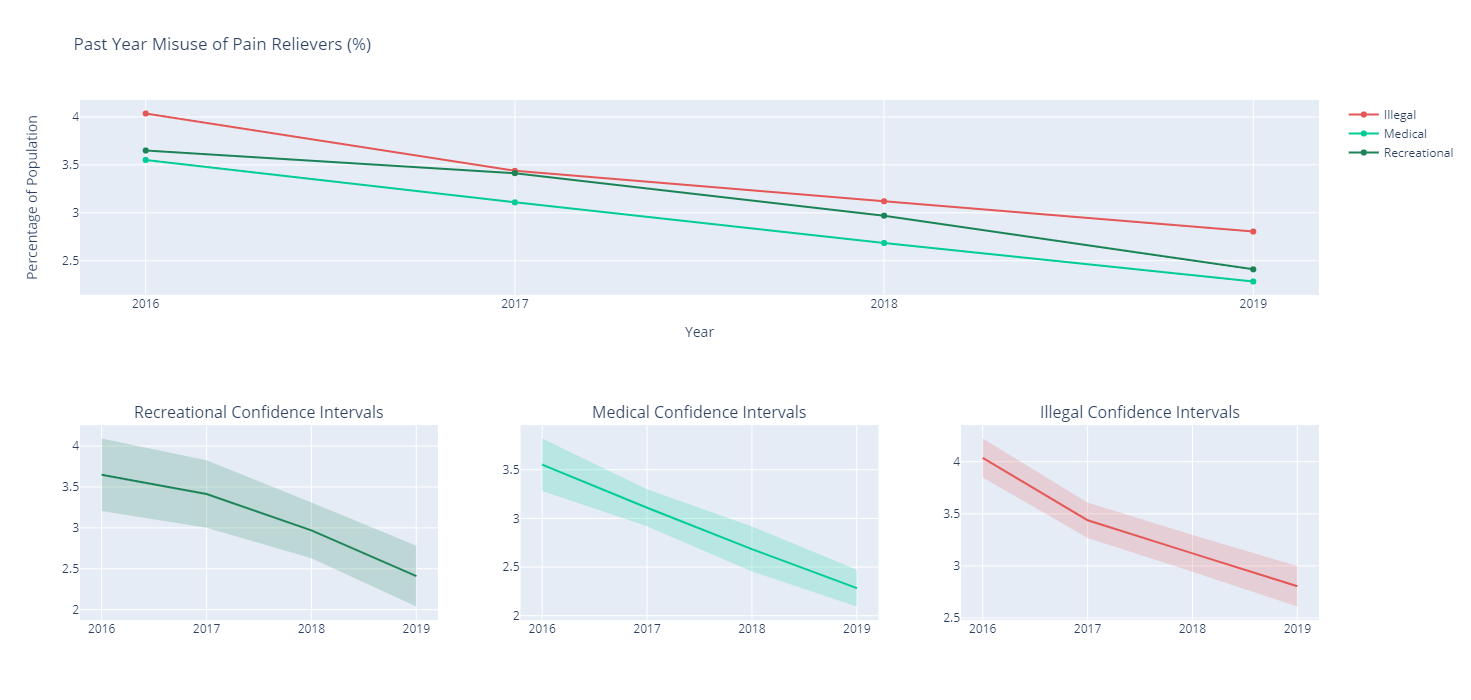

In [23]:
#3 datasets for different legal status
#drop all NaNs only in the Past Year Misuse of Pain Relievers % column (if dropna all NaNs then relevant data would be lost)
#dropna required to calculate CI
illegal_PR = data_teens[data_teens['Legal Status'] == 'Illegal'].dropna(subset=['Past Year Misuse of Pain Relievers %']) 
recreational_PR = data_teens[data_teens['Legal Status'] == 'Recreational'].dropna(subset=['Past Year Misuse of Pain Relievers %']) 
medical_PR = data_teens[data_teens['Legal Status'] == 'Medical'].dropna(subset=['Past Year Misuse of Pain Relievers %']) 

question = "Past Year Misuse of Pain Relievers %"

#Call my calc_CI method in conf_int_methods.py
y_upper_i, y_lower_i = calc_CI(illegal_PR, question, 2016)
y_upper_m, y_lower_m = calc_CI(medical_PR, question, 2016)
y_upper_r, y_lower_r = calc_CI(recreational_PR, question, 2016)

medical_PR = medical_PR.groupby(['Survey Year']).mean().reset_index()
illegal_PR = illegal_PR.groupby(['Survey Year']).mean().reset_index()
recreational_PR = recreational_PR.groupby(['Survey Year']).mean().reset_index()

df = pd.pivot_table(data_teens, values=question, index=['Survey Year'],columns='Legal Status', aggfunc=np.mean)


#call my method in conf_int_methods.py that creates a figure with
#one big plot above 3 small plots
fig = create_fig(df)
# call the add_plot method in conf_int_methods.py to add each one of the lower 3 plots to the figure
add_plot(illegal_PR, 2, 3, 'rgb(228,87,86)', fig, y_upper_i, y_lower_i, 'rgba(228,87,86,0.2)', question)
add_plot(medical_PR, 2, 2, 'rgb(0,204,150)', fig, y_upper_m, y_lower_m, 'rgba(0,204,150,0.2)', question)
add_plot(recreational_PR, 2, 1, 'rgb(28,131,86)', fig, y_upper_r, y_lower_r, 'rgba(28,131,86,0.2)', question)
fig.update_layout(title_text="Past Year Misuse of Pain Relievers (%)", height=700)
fig.update_layout(xaxis_title="Year", yaxis_title = "Percentage of Population")
fig.update_layout(xaxis= dict(tick0=2016, dtick=1))
fig.show()

The visualization above displays the role RML plays in teen pain reliever misuse. Medical states followed the most consistent decline, with an almost perfectly straight scatter plot. Additionally, recreational and illegal states both had decreasing proportions between 2016 and 2019. In fact, the rate at which these proportions declined within each state is almost exactly the same. All of recreational, medical, and illegal states experienced a decline of aproximately 1.2%. Although the averages between each category differ, the rate of change across all 3 categories was consistent. This would back the claim that marijuana is not a gateway drug, as there is no significant increase (or even a smaller decrease) of pain reliever use in recreational states when compared to illegal ones. 

<a id='prROD'></a>
### Rates of Decline

As mentioned above, all the states in each category exhibited similar declines between 2016 and 2019. 

In [24]:
print("Recreational States: change between 2016 and 2019 = ", df['Recreational'][2019] - df['Recreational'][2016])
print("Medical States: change between 2016 and 2019 = ", df['Medical'][2019] - df['Medical'][2016])
print("Illegal States: change between 2016 and 2019 = ", df['Illegal'][2019] - df['Illegal'][2016])

Recreational States: change between 2016 and 2019 =  -1.2400000000000002
Medical States: change between 2016 and 2019 =  -1.2684210526315787
Illegal States: change between 2016 and 2019 =  -1.2317391304347818


These results refute the claim that marijuana is a gateway drug. If marijuana was infact a gateway drug that caused more people to use pain relievers, then an increase in recreational states would be expected. Not only is there no increase, but the rate of decline is greater in recreational states than in illegal states. Due to the extreme similarities in the rates of decline, it is unnecessary to conduct a statistical test. A test is only required to prove that a difference is (or is not) significant, however, no difference was displayed in this data. 

<a id='heroin'></a>
## Heroin
[Jump to TOC](#toc)

The specific focus of this subsection will be on the data in the `Past Year Heroin Use` columns. These columns include total counts and percentages for the estimated number of teens in each state that used pain relievers between 2015 and 2019. 

*Note: Survey year 2013 and 2014 are missing data because this question was not part of the survey during those years.*

In [25]:
data_teens.iloc[:, 0:3].join(data_teens.iloc[:, 12:13].join(data_teens.iloc[:, 28:29]))

,State,Survey Year,Age,Past Year Heroin Use (total),Past Year Heroin Use %
1,Alabama,2013,12-17,NaN,NaN
6,Alabama,2014,12-17,NaN,NaN
11,Alabama,2015,12-17,0.0,0.08
16,Alabama,2016,12-17,0.0,0.01
21,Alabama,2017,12-17,0.0,0.02
...,...,...,...,...,...
1726,Wyoming,2015,12-17,0.0,0.05
1731,Wyoming,2016,12-17,0.0,0.09
1736,Wyoming,2017,12-17,0.0,0.08
1741,Wyoming,2018,12-17,0.0,0.07


<a id='heroinci'></a>
### Plotting with Confidence Intervals

Confidence intervals are calculated at a 95% confidence level for the past year heroin use in recreational, medical and illegal states. A pivot table with the yearly averages in illegal, medical, and recreational states is used to graph all 3 line plots in the same figure. Finally, the calculated confidence intervals are used in individual plots to visually display the margin of error with the survey estimates. 

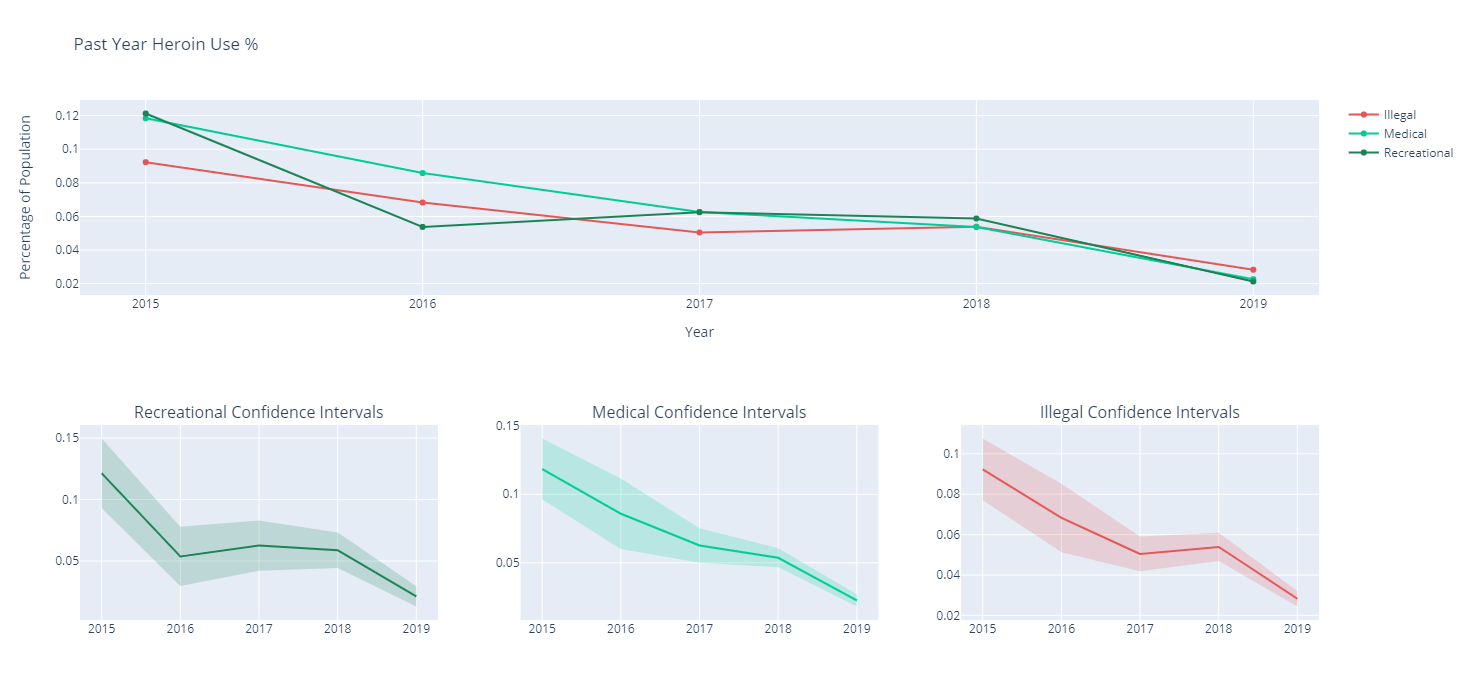

In [26]:
#Calculating Confidence Intervals
question = "Past Year Heroin Use %"

illegal_data = data_teens[data_teens['Legal Status'] == 'Illegal'].dropna(subset=[question]) 
recreational_data = data_teens[data_teens['Legal Status'] == 'Recreational'].dropna(subset=[question]) 
medical_data = data_teens[data_teens['Legal Status'] == 'Medical'].dropna(subset=[question]) 

#call my method in conf_int_methods.py to calculate the upper and lower confidence interval values
y_upper_i, y_lower_i = calc_CI(illegal_data, question, 2015)
y_upper_m, y_lower_m = calc_CI(medical_data, question, 2015)
y_upper_r, y_lower_r = calc_CI(recreational_data, question, 2015)

medical_data = medical_data.groupby(['Survey Year']).mean().reset_index()
illegal_data = illegal_data.groupby(['Survey Year']).mean().reset_index()
recreational_data = recreational_data.groupby(['Survey Year']).mean().reset_index()

df = pd.pivot_table(data_teens, values=question, index=['Survey Year'],columns='Legal Status', aggfunc=np.mean)

#call my method in conf_int_methods.py that creates a figure with
#one big plot above 3 small plots
fig = create_fig(df)
# call the add_plot method in conf_int_methods.py to add each one of the lower 3 plots to the figure
add_plot(illegal_data, 2, 3, 'rgb(228,87,86)', fig, y_upper_i, y_lower_i, 'rgba(228,87,86,0.2)', question)
add_plot(medical_data, 2, 2, 'rgb(0,204,150)', fig, y_upper_m, y_lower_m, 'rgba(0,204,150,0.2)', question)
add_plot(recreational_data, 2, 1, 'rgb(28,131,86)', fig, y_upper_r, y_lower_r, 'rgba(28,131,86,0.2)', question)
fig.update_layout(title_text=question, height=700)
fig.update_layout(xaxis_title="Year", yaxis_title = "Percentage of Population")
fig.update_layout(xaxis= dict(tick0=2016, dtick=1))
fig.show()

The visualization above provides important insight as to the effects of RML on heroin use. While states with recreational marijuana had the highest average percentage of teen heroin use in 2015, these states also had the lowest average in 2019. Similarly, states with medical marijuana had high (almost identical) percentages in 2015 and significantly lower numbers in 2019. One may use this visualization against the argument that marijuana is a gateway drug, as there is no indication that RML increases heroin use in teens. With statistical significance, this may even be used to claim that RML correlates to a decrease in heroin use among teens.

<a id='heroinStat'></a>
### Statistical Test



In [27]:
ancova(data=data_teens, dv="Past Year Heroin Use %", covar='Survey Year', between='Legal Status', effsize='np2')

,Source,SS,DF,F,p-unc,np2
0,Legal Status,0.005163,2,2.761013,6.519598e-02,0.022042
1,Survey Year,0.163923,1,175.306190,1.514994e-30,0.417092
2,Residual,0.229092,245,NaN,NaN,NaN


Both resulting p-values are below the significance level of 0.05, indicating statistical significance. The ANCOVA test provides sufficient evidence to back the claim that heroin use in recreational states is significantly lower than heroin use in illegal states. It is important to note that the statistical significance does not imply causation. While one may argue that RML correlates to a decrease in teen heroin use, the claim that RML *causes* a decrease in heroin use would be false. Although one can not directly claim that RML decreases heroin use in teens, it is reasonable to claim that marijuana is not a gateway drug that leads to an increase in heroin use as the visualization displays opposite behavior. 

<a id='meth'></a>
## Methamphetamines
[Jump to TOC](#toc)

The specific focus of this subsection will be on the data in the `Past Year Methamphetamine Use` columns. These columns include total counts and percentages for the estimated number of teens in each state that used methamphetamines between 2017 and 2019. 

*Note: Survey years 2013 through 2016 are missing data because this question was not part of the survey during those years.*

In [28]:
data_teens.iloc[:, 0:3].join(data_teens.iloc[:, 13:14].join(data_teens.iloc[:, 29:30]))[4:7]

,State,Survey Year,Age,Past Year Methamphetamine Use (total),Past Year Methamphetamine Use %
21,Alabama,2017,12-17,1.0,0.24
26,Alabama,2018,12-17,1.0,0.33
31,Alabama,2019,12-17,1.0,0.22


<a id='methci'></a>
### Plotting with Confidence Intervals

Confidence intervals are calculated at a 95% confidence level for the past year methamphetamine use in recreational, medical and illegal states. A pivot table with the yearly averages in illegal, medical, and recreational states is used to graph all 3 line plots in the same figure. Finally, the calculated confidence intervals are used in individual plots to visually display the margin of error with the survey estimates. 

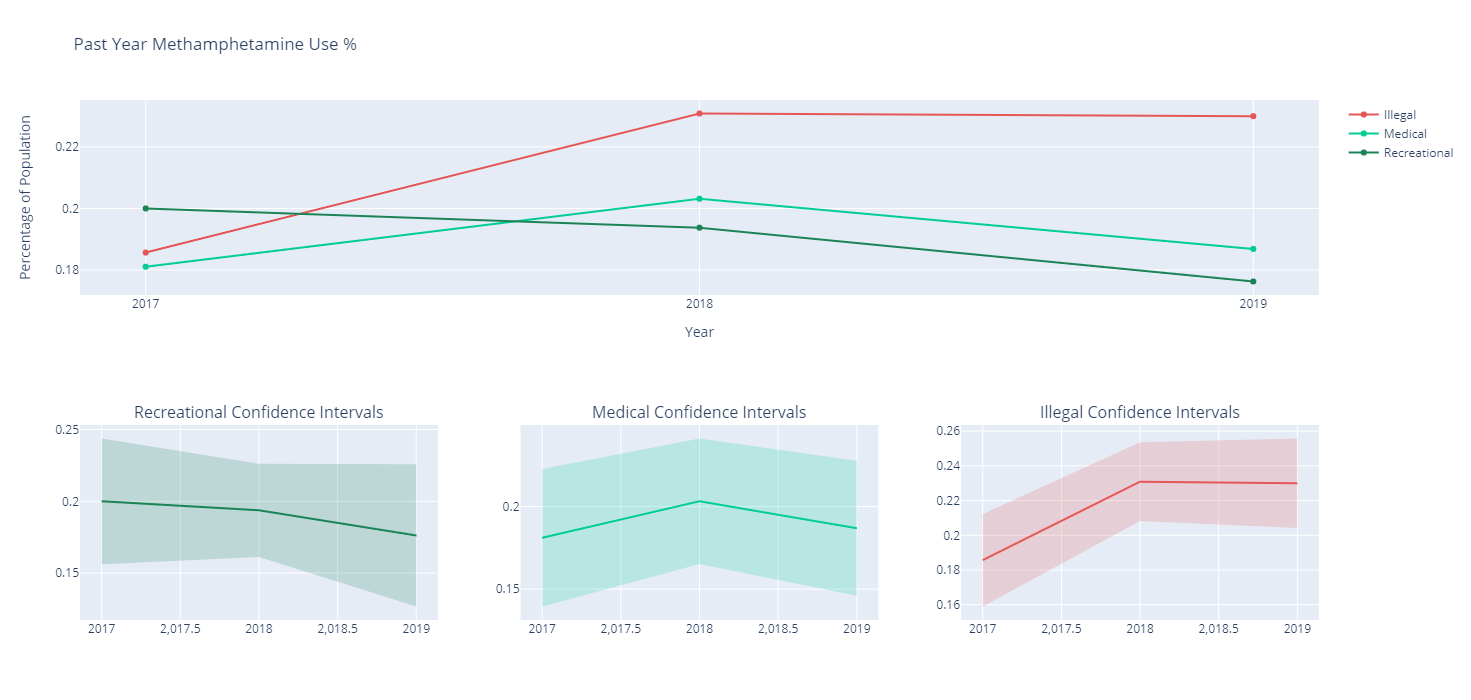

In [29]:
#Calculating Confidence Intervals
question = "Past Year Methamphetamine Use %"

illegal_data = data_teens[data_teens['Legal Status'] == 'Illegal'].dropna(subset=[question]) 
recreational_data = data_teens[data_teens['Legal Status'] == 'Recreational'].dropna(subset=[question]) 
medical_data = data_teens[data_teens['Legal Status'] == 'Medical'].dropna(subset=[question]) 

#call my method in conf_int_methods.py to calculate the upper and lower confidence interval values
y_upper_i, y_lower_i = calc_CI(illegal_data, question, 2017)
y_upper_m, y_lower_m = calc_CI(medical_data, question, 2017)
y_upper_r, y_lower_r = calc_CI(recreational_data, question, 2017)

medical_data = medical_data.groupby(['Survey Year']).mean().reset_index()
illegal_data = illegal_data.groupby(['Survey Year']).mean().reset_index()
recreational_data = recreational_data.groupby(['Survey Year']).mean().reset_index()

df = pd.pivot_table(data_teens, values=question, index=['Survey Year'],columns='Legal Status', aggfunc=np.mean)

#call my method in conf_int_methods.py that creates a figure with
#one big plot above 3 small plots
fig = create_fig(df)
# call the add_plot method in conf_int_methods.py to add each one of the lower 3 plots to the figure
add_plot(illegal_data, 2, 3, 'rgb(228,87,86)', fig, y_upper_i, y_lower_i, 'rgba(228,87,86,0.2)', question)
add_plot(medical_data, 2, 2, 'rgb(0,204,150)', fig, y_upper_m, y_lower_m, 'rgba(0,204,150,0.2)', question)
add_plot(recreational_data, 2, 1, 'rgb(28,131,86)', fig, y_upper_r, y_lower_r, 'rgba(28,131,86,0.2)', question)
fig.update_layout(title_text=question, height=700)
fig.update_layout(xaxis_title="Year", yaxis_title = "Percentage of Population")
fig.update_layout(xaxis= dict(tick0=2016, dtick=1))
fig.show()

This visualization displays interesting facts regarding RML and methamphetamine use. One interesting feature of the scatter plots is that recreational states had an overall decrease in teen methamphetamine use between 2017 and 2019. On the other hand, both medical and illegal states had overall increases between these years. Analyzing the proportions even further, both medical and illegal states had spikes between 2017 and 2018 followed by drops in 2019. However, these drops were not significant enough for the overall proportion to be considered decreasing. Recreational states had decreasing proportions each year between 2017 and 2019 while medical and illegal states displayed less consistent behavior. 

<a id='methStat'></a>
### Statistical Test

In [30]:
ancova(data=data_teens, dv="Past Year Methamphetamine Use %", covar='Survey Year', between='Legal Status', effsize='np2')

,Source,SS,DF,F,p-unc,np2
0,Legal Status,0.023777,2,2.550051,0.081551,0.033753
1,Survey Year,0.008836,1,1.895290,0.170714,0.012815
2,Residual,0.680664,146,NaN,NaN,NaN


The resulting p-values of this ANCOVA test are both above the significance level of 0.05, indicating a lack of statistical significance. This test provides evidence to argue that the proportion of teens using methamphetamines in recreational states is no different from that of illegal states. While the visualization shows a fairly large gap between the 2019 proportion in recreational states and illegal ones, the difference is not statistically significant. These results alone display the utmost importance of conducting statistical tests. Based solely on the visualization one may be inclined to argue that RML decreases methamphetamine use in teens. According to the visualization, the average proportion in recreational states decreased between 2017 and 2019 while both medical and illegal states saw increases. This is misleading to viewers as the ANCOVA test proves the differences shown in the visualization are a result of statistical variability, and there is no significance. It is insufficient to claim that RML is correlated with a decrease in methamphetamine use in teens as the ANCOVA test proves that this is statistically false. It is extremely important to provide both visual representations as well as statistical tests in order to prevent misuse and abuse of such data. However, since the ANCOVA test proves that there is no significant difference, one may argue that marijuana is not a gateway drug. If the claim was to be true, one would expect to see a significant increase of teen methamphetamine use in recreational states when compared to illegal states. This is not the case as the statistical test proves no significant difference, further refuting the claim of cannabis as a gateway drug.

<a id='gatewaysum'></a>
### Summary and Ethics

Is marijuana a gateway drug? That question may not be directly answered through these results, however, the analysis provides insight that backs or refutes the claim. When first looking at pain relievers, there is no indication that marijuana leads to greater proportions of teen misuse. The rate of decline in the proportion of teens misusing pain relievers is the same across recreational, medical and illegal states. These results provide evidence that RML does not increase pain reliever misuse in teens and may be used to refute the claim that marijuana is a gateway drug. While this does not necessarily mean one can say marijuana is not a gateway drug, these results provide evidence that RML does not increase misuse of pain relievers. The results from the `past year heroin use` data provides even more evidence that would refute the claim that marijuana is a gateway drug. While the proportion of teen heroin use in medical and illegal states both declined within the given time period, recreational states had the greatest decline. Starting with the highest proportion in 2015, recreational states ended with the lowest proportion of teen heroin use in 2019. Results from the ANCOVA test allow one to claim that the difference in proportions between recreational and illegal states is statistically significant. While it would be wrong to claim that marijuana causes a decrease in teen heroin use, these results may be used to argue against the claim of cannabis being a gateway drug. Results from both the pain reliever data and heroin data refute the claim that marijuana is a gateway drug. Finally, past year methamphetamine use was analyzed to see the effects of RML on teen methamphetamine use. Although the visualization displays a decrease in methamphetamine use in recreational states, with increases in both medical and illegal states, the statistical test does not provide evidence to a significant difference. With p values above the significance level, methamphetamine data may be used to refute the claim that marijuana is a gateway drug. The results provide evidence that there is no significant difference between the proportions in recreational and illegal states, indicating that methamphetamine use is not higher in recreational states. Because there is no significant difference, the claim that marijuana incrases methamphetamine use would be false further refuting the claim of cannabis as a gateway drug. 


<a id='sources'></a>
## Sources 

Bieber, C. (2021, March 2). Marijuana Tax Revenue: A State-by-State Breakdown. The Motley Fool. https://www.fool.com/research/marijuana-tax-revenue-by-state/#:~:text=That%20remains%20to%20be%20seen,revenue%20from%20recreational%20cannabis%20already. 

Centers for Disease Control and Prevention. (2018, March 7). Does marijuana use lead to other drug use? Centers for Disease Control and Prevention. https://www.cdc.gov/marijuana/faqs/does-marijuana-lead-to-other-drugs.html. 

Coley, R. L., Kruzik, C., Ghiani, M., Carey, N., Hawkins, S. S., & Baum, C. F. (2020). Recreational Marijuana Legalization and Adolescent Use of Marijuana, Tobacco, and Alcohol. The Journal of adolescent health : official publication of the Society for Adolescent Medicine, S1054-139X(20)30633-9. Advance online publication. https://doi.org/10.1016/j.jadohealth.2020.10.019

Madeline Heim, P. F. (2021, March 9). Fact-check: Has youth marijuana usage dropped in states that have legalized? Statesman. https://www.statesman.com/story/news/politics/politifact/2021/03/09/wisconsin-democratic-lawmaker-overstates-youth-marijuana-claim/4642482001/. 

Map of Marijuana Legality by State. DISA Global Solutions. (2021, April 14). https://disa.com/map-of-marijuana-legality-by-state. 

National Survey on Drug Use and Health: CBHSQ Data. SAMHSA.gov. (n.d.). https://www.samhsa.gov/data/data-we-collect/nsduh-national-survey-drug-use-and-health. 

Paschall, M. J., García-Ramírez, G., & Grube, J. W. (2021). Recreational Marijuana Legalization and Use Among California Adolescents: Findings From a Statewide Survey. Journal of studies on alcohol and drugs, 82(1), 103–111. https://doi.org/10.15288/jsad.2021.82.103

Sepeda-Miller, K. (2021, May 25). Fact-Check: Cassidy Puffs Up What Stats Say About Teen Marijuana Use. Better Government Association. https://www.bettergov.org/news/fact-check-cassidy-puffs-up-what-stats-say-about-teen-marijuana-use/. 

Trumble, S. (2017). Timeline of State Marijuana Legalization Laws – Third Way. Third Way. https://www.thirdway.org/infographic/timeline-of-state-marijuana-legalization-laws. 

Welcome to the National Survey on Drug Use and Health (NSDUH). National Survey on Drug Use and Health. (n.d.). https://nsduhweb.rti.org/respweb/homepage.cfm. 

Williams A. R. (2020). Cannabis as a Gateway Drug for Opioid Use Disorder. The Journal of law, medicine & ethics : a journal of the American Society of Law, Medicine & Ethics, 48(2), 268–274. https://doi.org/10.1177/1073110520935338







